# Value of Energy Cost Saving Program for businesses in New York City

## Import

In [1]:
# import libraries that we need in this part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Download csv file from web site and save on my directory Read csv file from directory

In [23]:
df = pd.read_csv("https://data.cityofnewyork.us/api/views/bug8-9f3g/rows.csv?accessType=DOWNLOAD")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [4]:
df.shape

(450, 26)

In [5]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


### How many different companies are represented in the data set?

In [6]:
counts = df["Company Name"].nunique()
counts

439

### How many different unique email domains names are there in the data set?

In [7]:
counts = df["company email"].nunique()
counts

420

### What is the total number of jobs created for businesses in Queens?

In [8]:
# Queens is on of subcategory of columns "Borough" so we have to split that part 
# by mask and then groupby column "Job created
df["Borough"].unique()

array(['Brooklyn', 'New York', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
Mask_dist = df["Borough"] == "Queens"
df = df[Mask_dist]

df.groupby(Mask_dist)["Job created"].sum()

Borough
True    102.0
Name: Job created, dtype: float64

### Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [10]:
df['NTA_mod']=df['NTA'].str.split('-')
df=df.explode('NTA_mod').reset_index(drop=True)

df_NTA_grp=df.groupby(['NTA_mod'])
df_ge_5 = df_NTA_grp.filter(lambda x: len(x) >= 5)

df_ge_5.groupby('NTA_mod').agg({ 
    'Total Savings': 'mean',
    'Job created': 'sum',
})

,Total Savings,Job created
NTA_mod,,
Brookville,17757.662000,0.0
College Point,17159.372857,2.0
Hunters Point,23931.398933,0.0
Long Island City,61830.770625,0.0
Maspeth,7828.552000,10.0
Queensbridge,61830.770625,0.0
Ravenswood,61830.770625,0.0
Springfield Gardens South,17757.662000,0.0
Steinway,11227.155714,20.0


### Save your result for the previous question as a CSV file.

In [11]:
df.to_csv("D:\TDI\Capston_Project\df_ge_5.csv")


## Explore

### create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.


#### create a scatter plot of jobs created versus average savings using standard scale

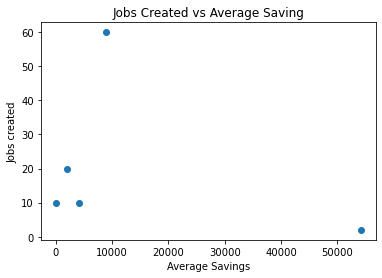

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x = df["Total Savings"], y= df["Job created"])
plt.xlabel("Average Savings")
plt.ylabel("Jobs created")
plt.title("Jobs Created vs Average Saving");

#### create a scatter plot of jobs created versus average savings using logaritmic scale

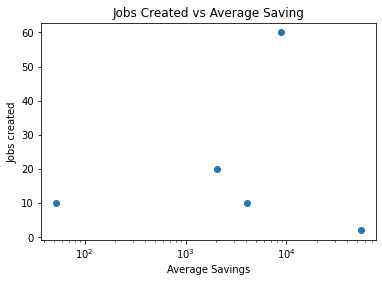

In [13]:
plt.scatter(x = df["Total Savings"], y= df["Job created"])
plt.xlabel("Average Savings")
plt.ylabel("Jobs created")
plt.title("Jobs Created vs Average Saving");
plt.xscale("log")
plt.plot()
plt.show()

### histogram of the log of the average total savings.

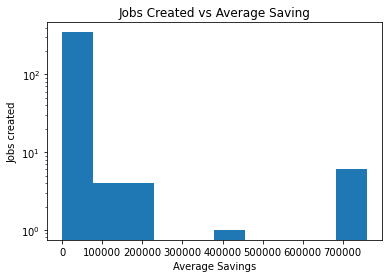

In [14]:
plt.hist(df['Total Savings'], log=True)
plt.xlabel("Average Savings")
plt.ylabel("Jobs created")
plt.title("Jobs Created vs Average Saving");

#### As you see in histogram, there is skewness in distribution of the data, so I decided to know more  about its descriptive Stat

In [15]:
df["Total Savings"].describe()

count       364.000000
mean      27811.603874
std       99335.732420
min         -30.820000
25%        2177.285000
50%        6615.250000
75%       18951.440000
max      759480.440000
Name: Total Savings, dtype: float64

#### Descriptive Stat shows that std is far more larger than mean in "Total Savings" which indicate there is outliers in dataset so I decided to drop 10 percent of the min and max of the data

### Data Wrangling

#### Check the bottom and top part of data that we want to drop

In [16]:
df["Total Savings"].quantile([0.1, 0.9])

0.1      823.521
0.9    39801.680
Name: Total Savings, dtype: float64

#### Define a mask 

In [17]:
low, high =df["Total Savings"].quantile([0.1, 0.9])
mask_savings = df["Total Savings"].between(low, high)
mask_savings.head()

0    True
1    True
2    True
3    True
4    True
Name: Total Savings, dtype: bool

#### Define a function name "wrangle" and put the "mask_saving" on it

In [18]:
# remove outlier by defining a function as wrangle
def wrangle(filepath):
    df = pd.read_csv(filepath)
    low, high =df["Total Savings"].quantile([0.1, 0.9])
    mask_area = df["Total Savings"].between(low, high)
    df = df[mask_area]
    return df

In [19]:
df = wrangle ("https://data.cityofnewyork.us/api/views/bug8-9f3g/rows.csv?accessType=DOWNLOAD")

#### Histogram after romoving outlier

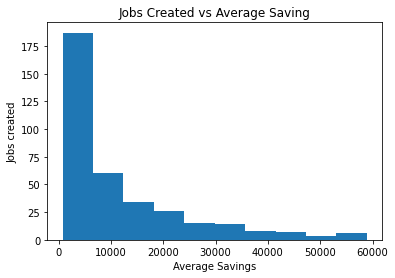

In [20]:
plt.hist(df["Total Savings"])
plt.xlabel("Average Savings")
plt.ylabel("Jobs created")
plt.title("Jobs Created vs Average Saving");

### line plot of the total jobs created for each month.

#### Extract month from "Effective Date" column and add total jobs created in each month 

In [21]:
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
df['month'] = df['Effective Date'].dt.month
df = df.groupby(df.month)['Job created'].sum()
df

month
1      0.0
2     15.0
3     10.0
4      0.0
5      2.0
6     60.0
7     20.0
8      0.0
9      0.0
10     0.0
11     5.0
12    10.0
Name: Job created, dtype: float64

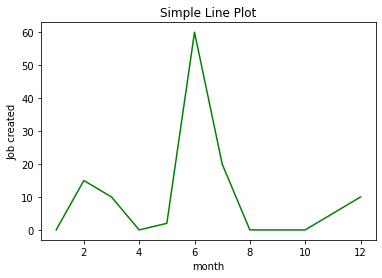

In [22]:
x = np.arange(1, 13)
y = np.array([0, 15, 10, 0, 2, 60, 20, 0, 0, 0, 5, 10])
  
# plot line
plt.plot(x, y, color = "green")
plt.xlabel('month')
plt.ylabel('Job created')
plt.title('Simple Line Plot')
plt.show()

## Comment for my Instructor 

### I tried to do my best, but to be honest, I search every where like google, stackoverflow to solve my problem, I totally understand what I did but this not me do it in half a day, I spent a week to answer whole question. I hope that I could pass through whole bootcamp. please comment me if you have any sugestion


##### Thanks
##### Hadi Radnezhad
###### Email: radnezhad.hadi@gmail.com